In [20]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pprint
import random
import os
import glob
from astropy.visualization import ZScaleInterval
import cv2
import tqdm

In [21]:
path = '../../data/fits'
files_name = glob.glob(os.path.join(path, "*.fits"))

In [22]:
data_i = 0
fits_file = files_name[data_i]

In [23]:
fits_file

'../../data/fits\\hst_10190_12_acs_wfc_f814w_j90o12_drc.fits'

In [24]:
hdu_list = fits.open(fits_file)
hdu_list.info()
# hdu_list.close()

Filename: ../../data/fits\hst_10190_12_acs_wfc_f814w_j90o12_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1027   ()      
  1  SCI           1 ImageHDU        83   (5810, 5802)   float32   
  2  WHT           1 ImageHDU        44   (5810, 5802)   float32   
  3  CTX           1 ImageHDU        37   (5810, 5802)   int32   
  4  HDRTAB        1 BinTableHDU    638   16R x 314C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, K, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 7A, L, D, D, D, 23A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 44A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 1A, D, 3A, 6A, K, D, D, D, D, D, D

In [25]:
image_data = hdu_list['SCI'].data

In [26]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: nan
Max: nan
Mean: nan
Stdev: nan


In [27]:
def print_stat_img(img):
    print('Min:', np.min(img))
    print('Max:', np.max(img))
    print('Mean:', np.mean(img))
    print('Stdev:', np.std(img))

# Play with .npy file

In [28]:
# fill nan with 0
# image_data[np.isnan(image_data)] = 0

In [29]:
print_stat_img(image_data)

Min: nan
Max: nan
Mean: nan
Stdev: nan


In [30]:
image_data, image_data.shape

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 (5802, 5810))

In [31]:
# flip then see shape
image_data = np.flip(image_data, axis=0)
image_data.shape

(5802, 5810)

In [32]:
# create npy file and save to desktop
np.save('test', image_data)

In [33]:
x = np.load('test.npy')
print_stat_img(x)

Min: nan
Max: nan
Mean: nan
Stdev: nan


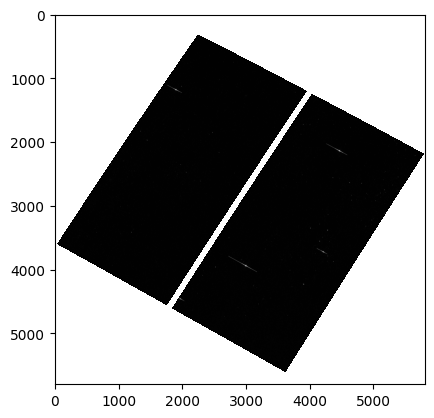

In [34]:
# display image from x
# change y-axis to be flipped
x = np.flip(x, axis=0)
plt.imshow(x, cmap='gray')

# Export .npy file

In [35]:
def export_pipeline(arr_fits, path_to_save):
    '''
    Don't process dead pixel because it will be processed in the YOLO automatically
    '''
    # loop via tqdm
    for fits_file in tqdm.tqdm(arr_fits):
        hdu_list = fits.open(fits_file)
        file_name = fits_file.split('\\')[-1].split('.')[0]
        image_data = hdu_list['SCI'].data
        image_data = np.flipud(image_data)
        image_data = np.flip(image_data, axis=0)
        np.save(path_to_save + file_name, image_data)

In [36]:
# load path fits
path_train = '../../data/fits/'
path_train = glob.glob(os.path.join(path_train, "*.fits"))
path_test = '../../data/fits/testing_set/'
path_test = glob.glob(os.path.join(path_test, "*.fits"))
print('Train:', len(path_train))
print('Test:', len(path_test))

Train: 20
Test: 6


In [37]:
export_path_train = '../../data/npy/full_img_flip/train/'
export_path_test = '../../data/npy/full_img_flip/test/'

In [38]:
# export train
export_pipeline(path_train, export_path_train)
print('Export train done')
# export test
export_pipeline(path_test, export_path_test)
print('Export test done')

100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


Export train done


100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

Export test done
